## MLP project

In [1]:
'''
Attribute Information:

Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
Class variable (0 or 1)
'''

'\nAttribute Information:\n\nNumber of times pregnant\nPlasma glucose concentration a 2 hours in an oral glucose tolerance test\nDiastolic blood pressure (mm Hg)\nTriceps skin fold thickness (mm)\n2-Hour serum insulin (mu U/ml)\nBody mass index (weight in kg/(height in m)^2)\nDiabetes pedigree function\nAge (years)\nClass variable (0 or 1)\n'

In [2]:
# !pip install torch 
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('diabetes.csv') 

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


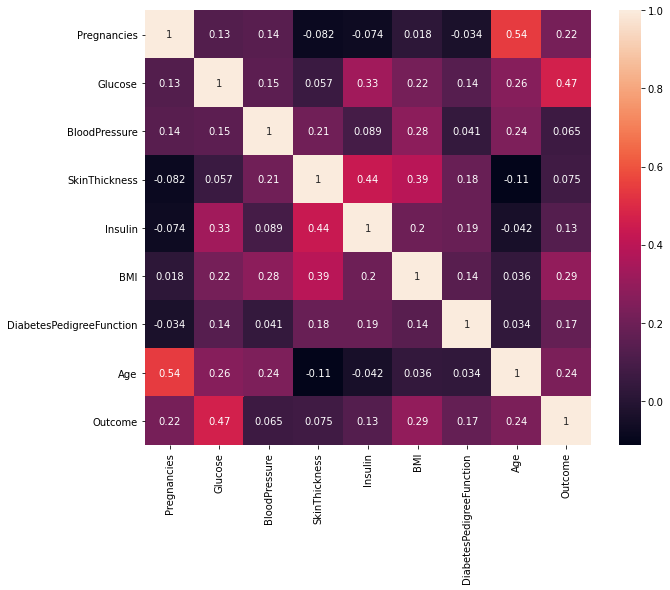

In [5]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [6]:
X = data.iloc[:,0:-1].values # all rows, first to last column (except last column), 
y = data.iloc[:,-1].values # convert to list only last column

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [8]:
print(X_train.shape)
print(y_train.shape)
print('--------------')
print(X_test.shape)
print(y_test.shape)



(614, 8)
(614,)
--------------
(154, 8)
(154,)


In [9]:
# Creating Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train.shape)
print(y_train.shape)
print('----------')
print(X_test.shape)
print(y_test.shape)
print('----------')
print(type(X_train))

torch.Size([614, 8])
torch.Size([614])
----------
torch.Size([154, 8])
torch.Size([154])
----------
<class 'torch.Tensor'>


In [10]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.fc1 = torch.nn.Linear(X.shape[1],5) # 8 
    self.fc2 = torch.nn.Linear(5,3)
    self.fc3 = torch.nn.Linear(3,2)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.sigmoid(out)
    out = self.fc2(out)
    out = self.sigmoid(out)
    out = self.fc3(out)
    return out


In [11]:
# Create an Object 
net = Model()

In [12]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [13]:
def train_MLP(model, X_train, y_train, criterion, optimizer):
    # criterion: المعيار (loss function)

    model.train()
    running_loss = 0.0
    running_corrects = 0.0
            
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # get values & indices with the max vals in the dim with scores for each class/label
    max_scores, preds = torch.max(outputs, dim=1)

    running_loss += loss.item() * X_train.size(0) 
    # This: correct += (preds == labels).sum().item() and this: running_corrects += torch.sum(preds == labels.data) are the same.
    running_corrects += torch.sum(preds == y_train.data)

    epoch_loss = running_loss / len(X_train)
    epoch_acc = running_corrects / len(X_train)

    return epoch_acc,epoch_loss

def validate_MLP(model, X_test, y_test, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0.0

    outputs = model(X_test)
    loss = criterion(outputs, y_test)

    _, preds = torch.max(outputs, 1)    # _: the value, preds: the index
    running_loss += loss.item() * X_test.size(0) 
    running_corrects += torch.sum(preds == y_test.data)

    epoch_loss = running_loss / len(X_test)
    epoch_acc = running_corrects/ len(X_test)

    return epoch_acc,epoch_loss

In [14]:
number_of_iteration = 614
final_losses = []
final_accuarcy = []
preds = []

test_losses = []
test_accuarcy = []
for i in range(number_of_iteration):
    i += 1
    epoch_acc, epoch_loss = train_MLP(net, X_train, y_train, loss_function, optimizer)
    final_losses.append(epoch_loss)
    final_accuarcy.append(epoch_acc)

    test_acc,test_loss = validate_MLP(net, X_test, y_test, loss_function)
    test_losses.append(test_loss)
    test_accuarcy.append(test_acc)

    if i % 10 == 0:
        print("Epoch number: {} and the loss : {}".format(i,epoch_loss))
        print("Epoch number: {} and the accuarcy : {}".format(i,100*epoch_acc))


Epoch number: 10 and the loss : 0.6401767730712891
Epoch number: 10 and the accuarcy : 65.3094482421875
Epoch number: 20 and the loss : 0.6373604536056519
Epoch number: 20 and the accuarcy : 65.3094482421875
Epoch number: 30 and the loss : 0.6321089267730713
Epoch number: 30 and the accuarcy : 65.3094482421875
Epoch number: 40 and the loss : 0.6290276050567627
Epoch number: 40 and the accuarcy : 65.3094482421875
Epoch number: 50 and the loss : 0.6245982646942139
Epoch number: 50 and the accuarcy : 65.3094482421875
Epoch number: 60 and the loss : 0.6197246313095093
Epoch number: 60 and the accuarcy : 65.3094482421875
Epoch number: 70 and the loss : 0.6142541170120239
Epoch number: 70 and the accuarcy : 65.3094482421875
Epoch number: 80 and the loss : 0.6084121465682983
Epoch number: 80 and the accuarcy : 65.3094482421875
Epoch number: 90 and the loss : 0.6022436022758484
Epoch number: 90 and the accuarcy : 65.14657592773438
Epoch number: 100 and the loss : 0.5958127975463867
Epoch numbe

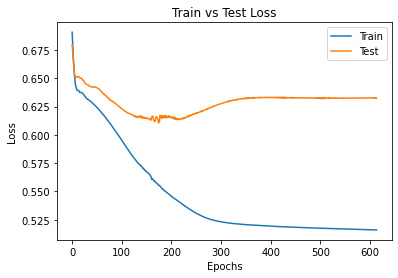

In [15]:
plt.plot(range(number_of_iteration),final_losses)
plt.plot(range(number_of_iteration),test_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Train vs Test Loss')
plt.show()

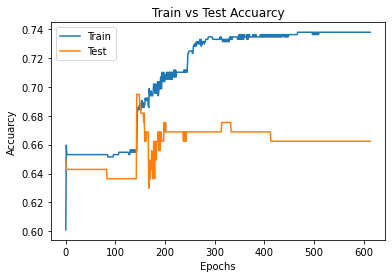

In [16]:
plt.plot(range(number_of_iteration),final_accuarcy)
plt.plot(range(number_of_iteration),test_accuarcy)
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuarcy')
plt.show()


Text(0.5, 0, 'Epochs')

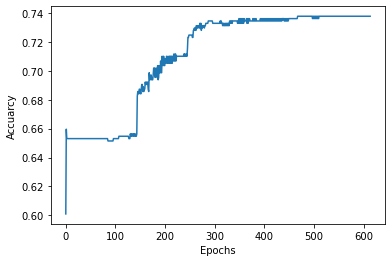

In [17]:
#plot the loss function
plt.plot(range(number_of_iteration),final_accuarcy)
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

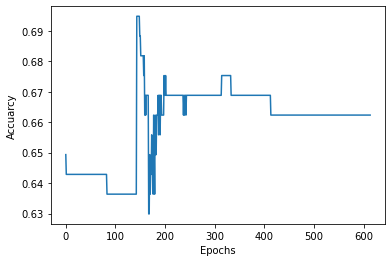

In [18]:
#plot the loss function
plt.plot(range(number_of_iteration),test_accuarcy)
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')

In [19]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = net(data)
        predictions.append(y_pred.argmax().item())

In [20]:
print(len(preds))
print(len(y_train))
print(len(predictions))
print(len(y_test))

0
614
154
154


In [21]:
print(predictions[0])

1


Text(33.0, 0.5, 'Predicted')

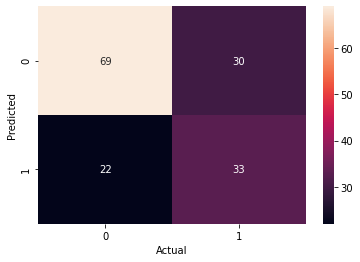

In [22]:
cm = confusion_matrix(y_test,predictions)

sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [23]:
epochs=500
final_losses=[]
for i in range(epochs):
    i= i+1
    y_pred=net.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i % 10 == 0:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 10 and the loss : 0.515959620475769
Epoch number: 20 and the loss : 0.5158045887947083
Epoch number: 30 and the loss : 0.5156762599945068
Epoch number: 40 and the loss : 0.5155543684959412
Epoch number: 50 and the loss : 0.5154348611831665
Epoch number: 60 and the loss : 0.5153164267539978
Epoch number: 70 and the loss : 0.5151983499526978
Epoch number: 80 and the loss : 0.5150803923606873
Epoch number: 90 and the loss : 0.5149626135826111
Epoch number: 100 and the loss : 0.5148451328277588
Epoch number: 110 and the loss : 0.5147279500961304
Epoch number: 120 and the loss : 0.5146113038063049
Epoch number: 130 and the loss : 0.5144951939582825
Epoch number: 140 and the loss : 0.5143797397613525
Epoch number: 150 and the loss : 0.5142651200294495
Epoch number: 160 and the loss : 0.5141514539718628
Epoch number: 170 and the loss : 0.5140388011932373
Epoch number: 180 and the loss : 0.5139274001121521
Epoch number: 190 and the loss : 0.5138171315193176
Epoch number: 200 and 

Text(0, 0.5, 'Epochs')

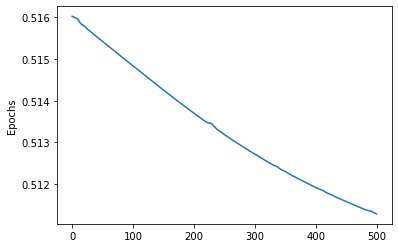

In [24]:
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.ylabel('Epochs')